In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Load the dataset

In [2]:
data=pd.read_csv("heart 1.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Head shows first 5 rows

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Tail shows last 5 rows

In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# Shape and size of the dataset

In [5]:
data.shape

(1025, 14)

In [6]:
data.size

14350

# Describe the data

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# Information about the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Count null values if any

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Cheaking duplicate values

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

# Count persons having heart disease and not having heart disease. 0-no heart disease, 1- heart disease 

In [11]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# By visualizing cheak the data is balance or not

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

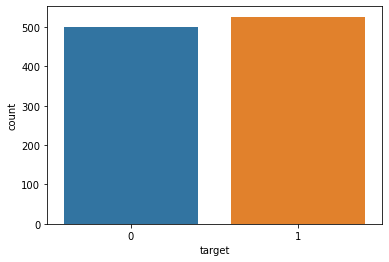

In [12]:
sns.countplot(data['target'])

# As we find that the data is already balanced so we do not need to balance the data

# Correlation information of variables

<AxesSubplot:>

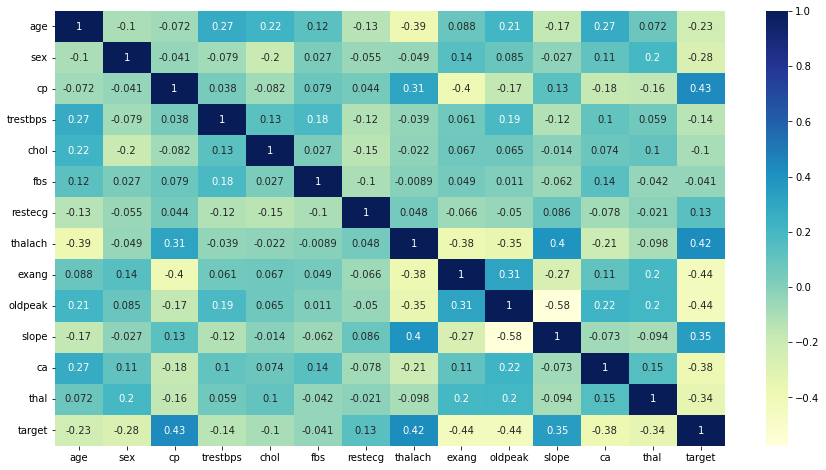

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

# Age Information

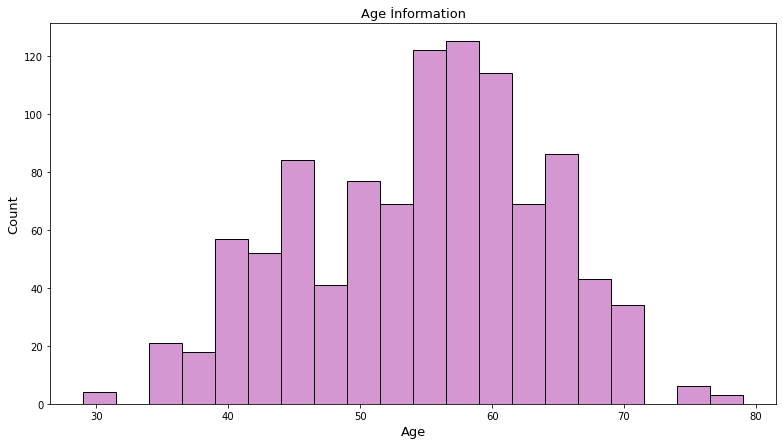

In [14]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="age",color="#C875C4",binwidth=2.5,element="bars");
plt.title("Age İnformation",size=13)
plt.xlabel("Age",size=13);
plt.ylabel("Count",size=13);

# Cheak about various ages no. of male and females in dataset

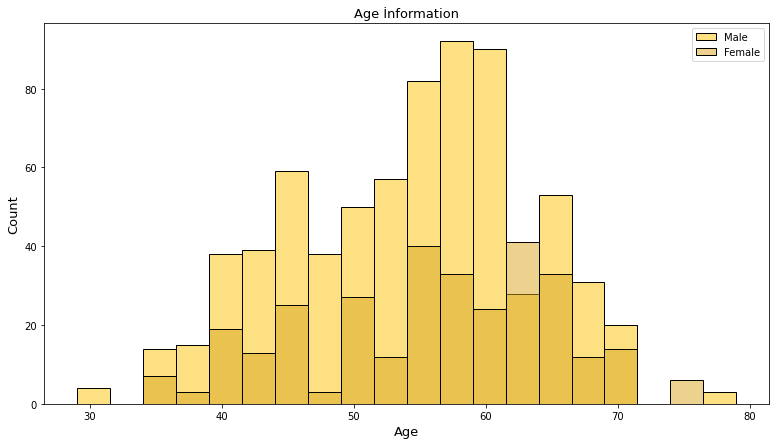

In [15]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="age",hue="sex",palette=sns.color_palette(["#DAA520","#FAC205"]),binwidth=2.5,element="bars");
plt.legend(["Male","Female"])
plt.title("Age İnformation",size=13)
plt.xlabel("Age",size=13);
plt.ylabel("Count",size=13);
plt.show()

# By pie chart and bar graph count no. of females and males

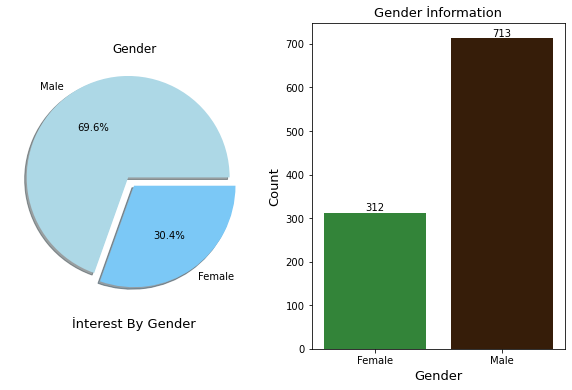

In [16]:
countgender=data[["sex"]].value_counts().reset_index(name="Count").replace({1:"Male",0:"Female"})
gender=countgender["sex"].tolist()
count=countgender["Count"].tolist()

plt.figure(figsize=(10,6))       # figure size decresing
plt.subplot(1,2,1)
explode=[0.1,0.0]
palette=sns.color_palette(["#ADD8E6","#7BC8F6"])
plt.pie(count,labels=gender,autopct="%1.1f%%",colors=palette,explode=explode,shadow=True)
plt.title("Gender")
plt.xlabel("İnterest By Gender",size=13)
#
plt.subplot(1,2,2)
ax=sns.countplot(data=data,x="sex",palette=sns.color_palette(["#26912E","#3D1C02"]));
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1],["Female","Male"]);
plt.title("Gender İnformation",size=13)
plt.xlabel("Gender",size=13);
plt.ylabel("Count",size=13);
plt.show()

# NO. of females and males having heart disease or not

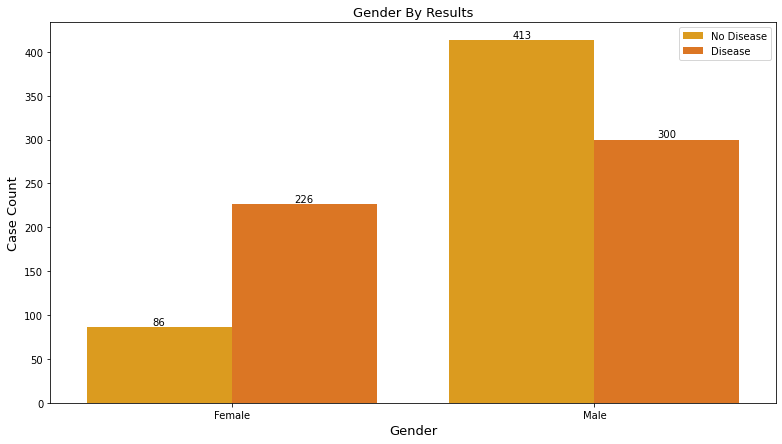

In [17]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data=data,x="sex",hue="target",palette=sns.color_palette(["#FAA500","#F97306"]))
for i in ax.containers:
    ax.bar_label(i)
plt.legend(["No Disease","Disease"])
plt.xticks([0,1],["Female","Male"])
plt.title("Gender By Results",size=13)
plt.xlabel("Gender",size=13)
plt.ylabel("Case Count",size=13)
plt.show()

# count persons having different types of chest pain

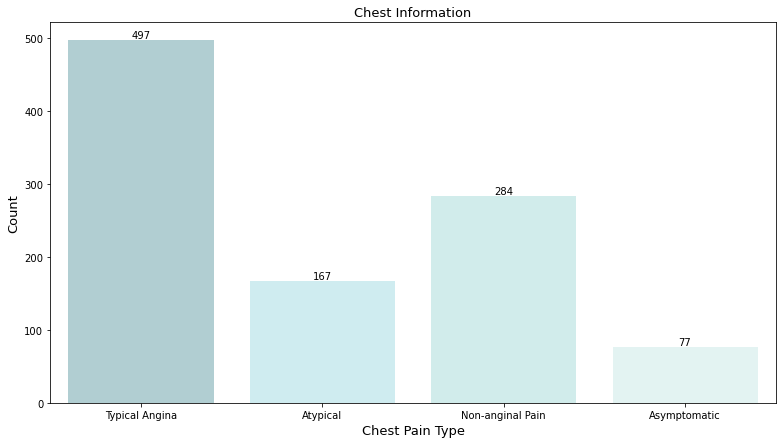

In [18]:
plt.figure(figsize=(13,7))
ax=sns.countplot(data=data,x="cp",palette=sns.color_palette(["#2F8F9D","#79DAE8","#82DBD8","#B3E8E5"]),alpha=0.4)
plt.xticks([0,1,2,3],["Typical Angina","Atypical","Non-anginal Pain","Asymptomatic"],size=10)
plt.title("Chest Information",size=13)
plt.xlabel("Chest Pain Type",size=13)
plt.ylabel("Count",size=13)
for i in ax.containers:
    ax.bar_label(i)

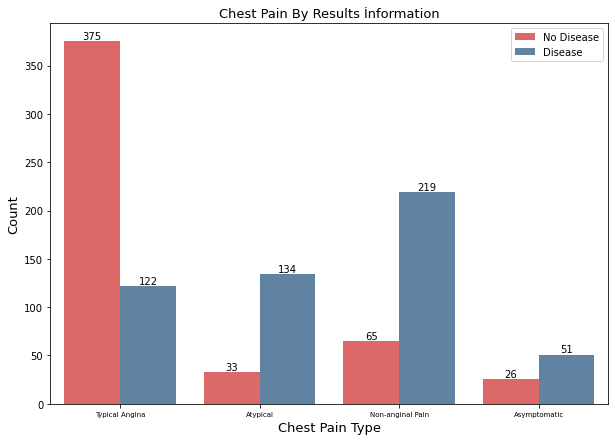

In [19]:
plt.figure(figsize=(10,7))
ax=sns.countplot(data=data,x="cp",hue="target",palette=sns.color_palette(["#F05454","#5584AC"]))
plt.legend(["No Disease","Disease"])
plt.xticks([0,1,2,3],["Typical Angina","Atypical","Non-anginal Pain","Asymptomatic"],size=7)
plt.title("Chest Pain By Results İnformation",size=13)
plt.xlabel("Chest Pain Type",size=13)
plt.ylabel("Count",size=13)
for i in ax.containers:
    ax.bar_label(i)

# Trestbps information

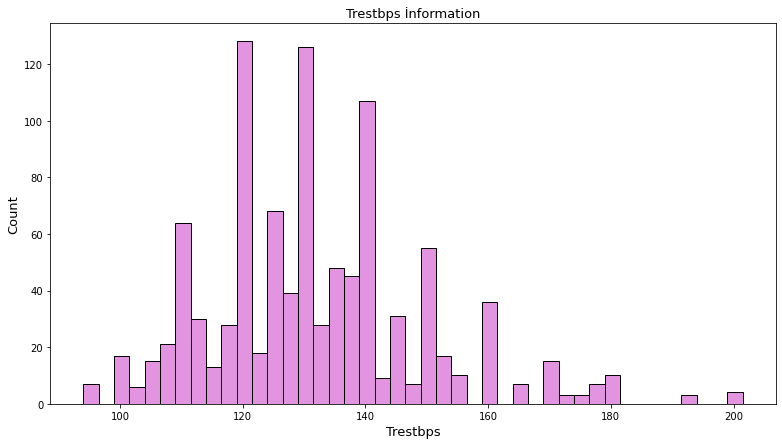

In [20]:
plt.figure(figsize=(13,7))
sns.histplot(data=data,x="trestbps",color="#DA70D6",binwidth=2.5,element="bars");
plt.title("Trestbps İnformation",size=13)
plt.xlabel("Trestbps",size=13);
plt.ylabel("Count",size=13);

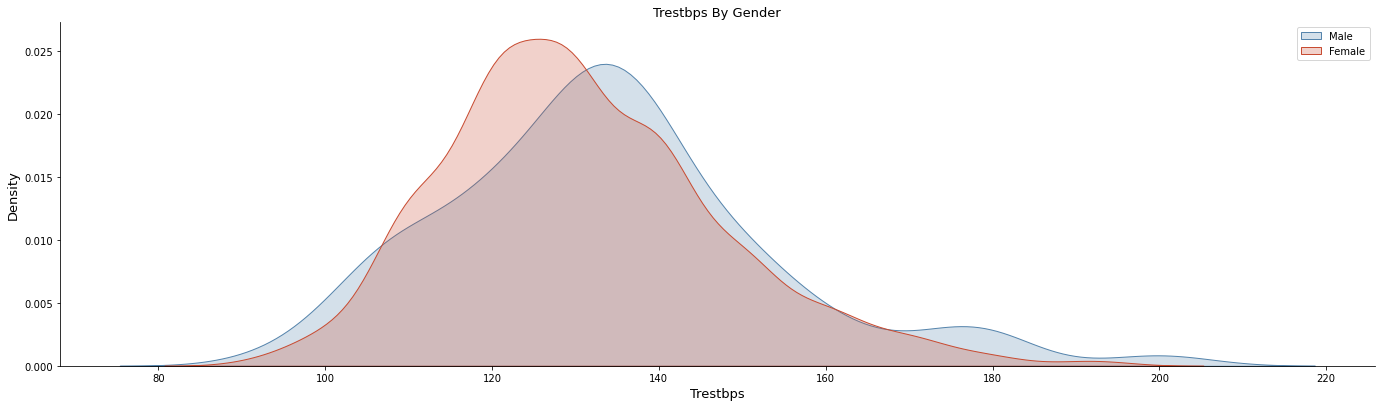

In [21]:
sns.FacetGrid(data=data,hue="sex",height=5.5, aspect=3.5,palette=sns.color_palette(["#5584AC","#C84B31"])).map(sns.kdeplot,
                                                                                   "trestbps",
                                                                                       shade="True")
plt.legend(["Male","Female"])
plt.title("Trestbps By Gender",size=13)
plt.xlabel("Trestbps",size=13)
plt.ylabel("Density",size=13)
plt.show()

# Getting Dummies-pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [22]:
cat_data=["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]
value_data=["age","trestbps","chol","thalach","oldpeak"]

In [23]:
cat_data.remove("sex")
cat_data.remove("target")
data=pd.get_dummies(data,columns=data[cat_data].columns,drop_first=True)
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1021,60,1,125,258,141,2.8,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
1022,47,1,110,275,118,1.0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1023,50,0,110,254,159,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Standardization and split the data in test and train data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
X=data.drop("target",axis=1)
y=data["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [28]:
np.round(X_train.describe(), 1)

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
count,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,...,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0
mean,54.4,0.7,131.7,245.1,149.4,1.0,0.2,0.3,0.1,0.1,...,0.3,0.5,0.5,0.2,0.1,0.1,0.0,0.1,0.5,0.4
std,9.2,0.5,17.6,49.7,22.9,1.1,0.4,0.4,0.3,0.4,...,0.5,0.5,0.5,0.4,0.3,0.3,0.1,0.2,0.5,0.5
min,29.0,0.0,94.0,126.0,71.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,47.0,0.0,120.0,211.0,132.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,56.0,1.0,130.0,240.0,152.0,0.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,61.0,1.0,140.0,274.0,166.2,1.6,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
max,77.0,1.0,200.0,564.0,202.0,6.2,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [29]:
np.round(X_train_scaled.describe(), 1)

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
count,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,...,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0,820.0
mean,0.5,0.7,0.4,0.3,0.6,0.2,0.2,0.3,0.1,0.1,...,0.3,0.5,0.5,0.2,0.1,0.1,0.0,0.1,0.5,0.4
std,0.2,0.5,0.2,0.1,0.2,0.2,0.4,0.4,0.3,0.4,...,0.5,0.5,0.5,0.4,0.3,0.3,0.1,0.2,0.5,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.4,0.0,0.2,0.2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.6,1.0,0.3,0.3,0.6,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.7,1.0,0.4,0.3,0.7,0.3,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X_train)

StandardScaler()

In [32]:
X_train = scaler.transform(X_train_scaled)

X_test = scaler.transform(X_test_scaled)

# Shape of train and test data

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 22) (820, 22) (205, 22)


# Apply logistic regresssion technique...

In [34]:
from sklearn.linear_model import LogisticRegression 
log_model=LogisticRegression().fit(X_train,y_train)
from sklearn.metrics import accuracy_score
X_train_prediction=log_model.predict(X_train)
training_data_accuracy_log= accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data:",training_data_accuracy_log*100)
X_test_prediction=log_model.predict(X_test)
test_data_accuracy_log= accuracy_score(X_test_prediction, y_test)
print("Accuracy on test data:", test_data_accuracy_log*100)

Accuracy on training data: 88.90243902439025
Accuracy on test data: 84.8780487804878


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# apply randomForestclassifier..

In [35]:
from sklearn.ensemble import RandomForestClassifier

randomforest_model= RandomForestClassifier()
randomforest_model.fit(X_train, y_train)
X_train_prediction=randomforest_model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data:",training_data_accuracy*100)
X_test_prediction=randomforest_model.predict(X_test)
test_data_accuracy_rf= accuracy_score(X_test_prediction, y_test)
print("Accuracy on test data:", test_data_accuracy_rf*100)

Accuracy on training data: 100.0
Accuracy on test data: 100.0


# On applying svm model

In [36]:
from sklearn import svm
sv_model= svm.SVC(kernel='linear')
sv_model.fit(X_train, y_train)
X_train_prediction=sv_model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data:",training_data_accuracy*100)
X_test_prediction=sv_model.predict(X_test)
test_data_accuracy_svm= accuracy_score(X_test_prediction, y_test)
print("Accuracy on test data:", test_data_accuracy_svm*100)


Accuracy on training data: 88.78048780487805
Accuracy on test data: 83.41463414634146


# Applying Naive Bayes ...

In [37]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB().fit(X_train,y_train)
X_train_prediction=nb_model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data:",training_data_accuracy*100)
X_test_prediction=nb_model.predict(X_test)
test_data_accuracy_nb= accuracy_score(X_test_prediction, y_test)
print("Accuracy on test data:", test_data_accuracy_nb*100)



Accuracy on training data: 85.24390243902438
Accuracy on test data: 80.48780487804879


In [38]:
data['target'].value_counts()


1    526
0    499
Name: target, dtype: int64

# on applying XGBClassifier

In [39]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train, y_train)
X_train_prediction=model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data:",training_data_accuracy*100)
X_test_prediction=model.predict(X_test)
test_data_accuracy_xgb= accuracy_score(X_test_prediction, y_test)
print("Accuracy on test data:", test_data_accuracy_xgb*100)

Accuracy on training data: 100.0
Accuracy on test data: 98.53658536585365


# Applying Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
X_train_prediction=dt_model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, y_train)
print("Accuracy on training data:",training_data_accuracy*100)
X_test_prediction=dt_model.predict(X_test)
test_data_accuracy_dt= accuracy_score(X_test_prediction, y_test)
print("Accuracy on test data:", test_data_accuracy_dt*100)

Accuracy on training data: 100.0
Accuracy on test data: 100.0


<BarContainer object of 6 artists>

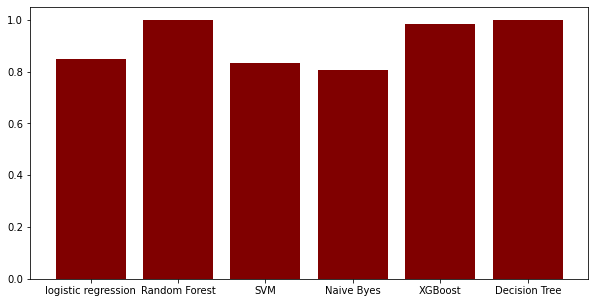

In [41]:
ml_models=("logistic regression","Random Forest","SVM","Naive Byes","XGBoost","Decision Tree")
Accuracies=(test_data_accuracy_log,test_data_accuracy_rf,test_data_accuracy_svm,test_data_accuracy_nb,test_data_accuracy_xgb,test_data_accuracy_dt)
fig = plt.figure(figsize = (10, 5))
plt.bar(ml_models,Accuracies, color ='maroon',width = 0.8)

# Here we can clearly see that random forest give good accuracy